# Linear Regression

**Problem: Housing Price Prediction**

Dataset used: https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?select=Housing.csv

This dataset provides key features for predicting house prices, including area, bedrooms, bathrooms, stories, amenities like air conditioning and parking, and information on furnishing status. It enables analysis and modelling to understand the factors impacting house prices and develop accurate predictions in real estate markets.


## Introduction

**Linear Regression** is one of the most fundamental algorithms in machine learning. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data.

### Key Concepts:

- **Supervised Learning**: Linear regression is a supervised learning algorithm, meaning we train it on labeled data (input-output pairs)
- **Regression Task**: Unlike classification which predicts discrete categories, regression predicts continuous numerical values
- **Use Cases**: Price prediction, trend analysis, forecasting, and understanding relationships between variables

## Step 1: Import Libraries and Load Data

We'll start by importing the necessary libraries:

- **NumPy**: For numerical operations and array handling
- **Matplotlib**: For data visualization and plotting
- **Pandas**: For data manipulation and analysis

The `describe()` function provides statistical summary of the dataset including count, mean, standard deviation, min, and max values for each numerical column.

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the housing dataset
df = pd.read_csv('datasets/housing-price-prediction.csv')

# Prepare training data
x_train = df['area'].to_numpy()
y_train = (df['price'] / 1000).to_numpy()  # Scale to thousands

# Feature scaling - normalize x to prevent numerical overflow
x_mean = np.mean(x_train)
x_std = np.std(x_train)
x_train_norm = (x_train - x_mean) / x_std

print(f"Training examples: {len(x_train)}")
print(f"Area range: {x_train.min():.0f} - {x_train.max():.0f} sqft")
print(f"Price range: ${y_train.min():.0f}K - ${y_train.max():.0f}K")
print(f"\nFeature scaling applied:")
print(f"  Original area: mean={x_mean:.2f}, std={x_std:.2f}")
print(f"  Normalized area: mean={np.mean(x_train_norm):.2f}, std={np.std(x_train_norm):.2f}")

Training examples: 545
Area range: 1650 - 16200 sqft
Price range: $1750K - $13300K

Feature scaling applied:
  Original area: mean=5150.54, std=2168.15
  Normalized area: mean=-0.00, std=1.00


### Why Feature Scaling?

Before we dive into the data, notice that we're applying **feature scaling** (normalization) to the area values. This is crucial for gradient descent:

**Without scaling:**
- Area values range from ~1000-16000 (very large)
- Gradients become enormous
- Can cause numerical overflow (NaN values)
- Training fails or is extremely unstable

**With scaling (standardization):**
- Transform to mean = 0, standard deviation = 1
- All values roughly between -3 and +3
- Gradients are manageable
- Faster, more stable convergence

The formula: $x_{norm} = \frac{x - \mu}{\sigma}$ where $\mu$ is mean and $\sigma$ is standard deviation.

In [221]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Exploring the Dataset

The `head()` function displays the first 5 rows of the dataset, giving us a quick look at:
- **Features**: area, bedrooms, bathrooms, stories, and various amenities
- **Target**: price (the value we want to predict)

For this tutorial, we'll focus on **univariate linear regression**, using only the house area to predict its price.

## Plotting the data

You can plot these two points using the scatter() function in the matplotlib library, as shown in the cell below.

- The function arguments marker and c show the points as red crosses (the default is blue dots).

You can use other functions in the matplotlib library to set the title and labels to display

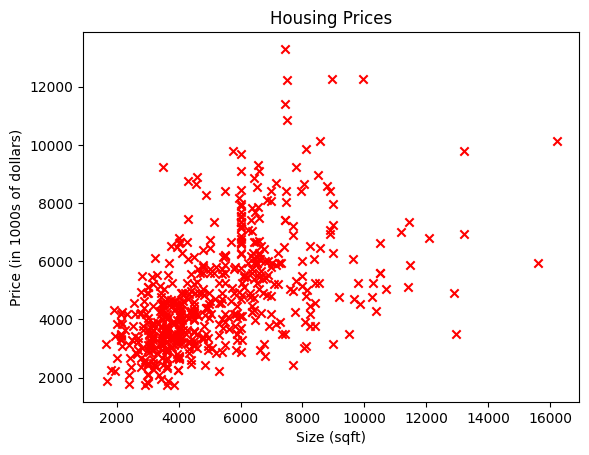

In [222]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (sqft)')
plt.show()

## Step 3: Model Function

The model function for linear regression (which is a function that maps from `x` to `y`) is represented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

### Understanding the Parameters:

- **$w$** (weight or slope): Determines how much the output changes for each unit change in input. A larger $w$ means steeper slope.
- **$b$** (bias or y-intercept): The value of $y$ when $x = 0$. It shifts the line up or down.

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot.

### How it Works:

For each input value $x^{(i)}$, the model:
1. Multiplies it by the weight $w$
2. Adds the bias $b$
3. Returns the predicted value $\hat{y}^{(i)}$

Let's implement this function and try different parameter values to see how they affect the predictions.

In [223]:
w = 1.5
b = 0
print(f"w: {w}")
print(f"b: {b}")

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
        x (ndarray): input features
        w (scalar): weight parameter
        b (scalar): bias parameter
    Returns:
        predictions (ndarray): model predictions
    """
    return w * x + b

print("✓ Model function defined")

w: 1.5
b: 0
✓ Model function defined


### Understanding the Model Function

The `compute_model_output` function is the heart of our linear regression model. Let's break down what it does:

**Input:**
- `x`: Array of input features (house areas)
- `w`: Weight parameter (slope of the line)
- `b`: Bias parameter (y-intercept)

**Process:**
- For each house area $x^{(i)}$, compute: $f_{w,b}(x^{(i)}) = w \times x^{(i)} + b$
- This is simply the equation of a straight line!

**Output:**
- Array of predicted prices for all houses

**Why vectorization?** We use NumPy's vectorized operations (`w * x + b`) instead of loops for better performance with large datasets.

### Implementing the Model Function

The `compute_model_output` function implements the linear regression equation. It:
1. Creates an array to store predictions
2. Loops through each training example
3. Computes $f_{w,b}(x^{(i)}) = wx^{(i)} + b$ for each example

**Try experimenting with different values of $w$ and $b$ to see how they affect the line!**

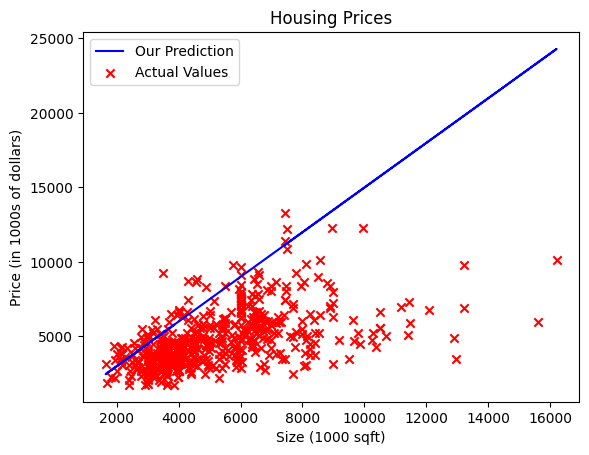

In [224]:
f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

### Visualizing Model Predictions

This plot shows:
- **Red crosses**: Actual house prices from our dataset
- **Blue line**: Our model's predictions based on current $w$ and $b$ values

The goal is to find values of $w$ and $b$ that make the blue line fit the red points as closely as possible.

### Model Fit Quality

Looking at the visualization above, we can see how well our current parameters fit the data. If the line doesn't pass through or near most of the data points, we need to adjust $w$ and $b$.

**Question**: How do we systematically find the best values for $w$ and $b$? 

**Answer**: We use a **cost function** to measure how well our model fits the data!

## Step 4: Cost Function

The **cost function** (also called **loss function**) measures how well our model performs. It quantifies the difference between predicted values and actual values.

### Mean Squared Error (MSE)

For linear regression, we use the Mean Squared Error cost function:

$$ J_{w,b} = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

### Breaking Down the Formula:

- **$f_{w,b}(x^{(i)})$**: Our model's prediction for example $i$
- **$y^{(i)}$**: The actual value for example $i$
- **$(f_{w,b}(x^{(i)}) - y^{(i)})$**: The error (or residual) for example $i$
- **Squaring the error**: Makes all errors positive and penalizes larger errors more heavily
- **$\sum_{i=1}^{m}$**: Sum the squared errors across all training examples
- **$\frac{1}{2m}$**: Average the error (the $\frac{1}{2}$ is a convention that simplifies calculus later)

### Goal:

Our objective is to **minimize** $J_{w,b}$ by finding optimal values of $w$ and $b$. The smaller the cost, the better our model fits the data!

In [225]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression
    Args:
        x (ndarray): input features
        y (ndarray): target values
        w (scalar): weight parameter
        b (scalar): bias parameter
    Returns:
        cost (scalar): mean squared error
    """
    m = len(x)
    predictions = compute_model_output(x, w, b)
    squared_errors = (predictions - y) ** 2
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost

print("✓ Cost function defined")

✓ Cost function defined


### Understanding the Cost Function Implementation

The `compute_cost` function measures how well our model fits the data. Here's what happens step by step:

**1. Get predictions:** Use our model to predict prices for all houses
```python
predictions = compute_model_output(x, w, b)
```

**2. Calculate errors:** Find the difference between predictions and actual prices
```python
errors = predictions - y
```

**3. Square the errors:** This makes all errors positive and penalizes large errors more
```python
squared_errors = errors ** 2
```

**4. Average the errors:** Sum all squared errors and divide by 2m
```python
cost = (1 / (2 * m)) * sum(squared_errors)
```

**Why divide by 2?** It simplifies the derivative calculation in gradient descent (the 2 cancels out with the exponent).

**Lower cost = better fit!** A cost of 0 means perfect predictions (rarely achievable in practice).

### Implementing the Cost Function

The `compute_cost` function calculates the MSE by:
1. Computing the squared error for each training example
2. Summing all squared errors
3. Dividing by $2m$ to get the average

The output below shows the cost for our current model parameters. **Lower cost = better fit!**

## Step 5: Visualizing the Cost Function

To build intuition about how the cost function works, we'll create an interactive visualization that shows:

1. **Left plot**: The data points and our model's predictions with visual representation of errors
2. **Right plot**: How the cost changes as we vary the parameter $w$ (with $b$ fixed at 0)

This helps us understand the relationship between model parameters and the cost function.

In [226]:
# Plotting cost function
#initiate variables
from matplotlib.colors import LinearSegmentedColormap
from ipywidgets import interact
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
n_bin = 5
dlcm = LinearSegmentedColormap.from_list('dl_map', dlcolors, N=n_bin)

def plt_house_x(X, y,f_wb=None, ax=None):
    ''' plot house with aXis '''
    if not ax:
        fig, ax = plt.subplots(1,1)
    ax.scatter(X, y, marker='x', c='r', label="Actual Value")

    ax.set_title("Housing Prices")
    ax.set_ylabel('Price (in 1000s of dollars)')
    ax.set_xlabel(f'Size (sqft)')
    if f_wb is not None:
        ax.plot(X, f_wb,  c=dlblue, label="Our Prediction")
    ax.legend()

def mk_cost_lines(x,y,w,b, ax):
    ''' makes vertical cost lines'''
    cstr = "cost = (1/m)*("
    ctot = 0
    label = 'cost for point'
    addedbreak = False
   
    # Only plot for a subset of points to avoid clutter
    indices = np.linspace(0, len(x)-1, min(10, len(x)), dtype=int)
    for idx in indices:
        p = (x[idx], y[idx])
        f_wb_p = w*p[0]+b
        c_p = ((f_wb_p - p[1])**2)/2
        c_p_txt = c_p
        ax.vlines(p[0], p[1],f_wb_p, lw=3, color=dlpurple, ls='dotted', label=label)
        label='' #just one
        cxy = [p[0], p[1] + (f_wb_p-p[1])/2]
        ax.annotate(f'{c_p_txt:0.0f}', xy=cxy, xycoords='data',color=dlpurple,
            xytext=(5, 0), textcoords='offset points')
        cstr += f"{c_p_txt:0.0f} +"
        if len(cstr) > 38 and addedbreak is False:
            cstr += "\n"
            addedbreak = True
        ctot += c_p
    ctot = ctot/(len(indices))
    cstr = cstr[:-1] + f") = {ctot:0.0f}"
    ax.text(0.15,0.02,cstr, transform=ax.transAxes, color=dlpurple)

def plt_intuition(x_train, y_train):

    # Adjusted w_range to be more appropriate for the data scale
    w_range = np.array([0.5, 2.5])
    tmp_b = 0
    
    w_array = np.linspace(*w_range, 50)
    cost = np.zeros_like(w_array)
    for i in range(len(w_array)):
        tmp_w = w_array[i]
        tmp_f_wb = compute_model_output(x_train, tmp_w, tmp_b)
        cost[i] = compute_cost(x_train, y_train, tmp_f_wb, tmp_b)


    @interact(w=(w_range[0], w_range[1], 0.1),continuous_update=False)
    def func( w=1.5):
        # f_wb = np.dot(x_train, w) + tmp_b
        f_wb = compute_model_output(x_train, w, tmp_b)

        fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(16,5))
        fig.canvas.toolbar_position = 'bottom'

        mk_cost_lines(x_train, y_train, w, tmp_b, ax[0])
        plt_house_x(x_train, y_train, f_wb=f_wb, ax=ax[0])

        ax[1].plot(w_array, cost)
        # cur_cost = compute_cost(x_train, y_train, w, tmp_b)
        cur_cost = compute_cost(x_train, y_train, w, tmp_b)
        ax[1].scatter(w,cur_cost, s=100, color=dldarkred, zorder= 10, label= f"cost at w={w}")
        ax[1].hlines(cur_cost, ax[1].get_xlim()[0],w, lw=4, color=dlpurple, ls='dotted')
        ax[1].vlines(w, ax[1].get_ylim()[0],cur_cost, lw=4, color=dlpurple, ls='dotted')
        ax[1].set_title("Cost vs. w, (b fixed at 0)")
        ax[1].set_ylabel('Cost')
        ax[1].set_xlabel('w')
        ax[1].legend(loc='upper center')
        fig.suptitle(f"Minimize Cost: Current Cost = {cur_cost:0.0f}", fontsize=12)
        plt.show()

### Visualization Helper Functions

The code below defines three helper functions:

1. **`plt_house_x`**: Creates a scatter plot of the housing data with optional model predictions
2. **`mk_cost_lines`**: Draws vertical lines showing the error (difference between prediction and actual value) for sample data points
3. **`plt_intuition`**: Creates an interactive widget that lets you adjust $w$ and see:
   - How the model line changes
   - How individual prediction errors change
   - How the total cost changes

The visualization uses a subset of data points to avoid clutter while still conveying the concept clearly.

In [227]:
plt_intuition(x_train,y_train)

interactive(children=(FloatSlider(value=1.5, description='w', max=2.5, min=0.5), Output()), _dom_classes=('wid…

### Interactive Cost Exploration

Use the slider below to adjust the weight parameter $w$ and observe:

- **Purple dotted lines**: Show the error for each sampled data point
- **Cost curve (right)**: Shows how the total cost varies with $w$
- **Red dot**: Indicates the current cost at the selected $w$ value

**Try to find the value of $w$ that minimizes the cost!** You'll notice the cost curve is convex (bowl-shaped), which means there's a single global minimum.

## Step 6: Finding Optimal Parameters with Gradient Descent

**Gradient Descent** is an optimization algorithm used to find the values of parameters (coefficients) that minimize a cost function. It's one of the most important algorithms in machine learning and is the backbone of training neural networks and many other models.

### The Problem

In our linear regression example, we had to manually adjust parameters $w$ and $b$ to minimize the cost function $J_{w,b}$. But what if we have:
- Hundreds or thousands of parameters?
- Complex, high-dimensional cost functions?
- No way to visualize the cost surface?

**Gradient Descent** provides a systematic, automated way to find optimal parameters!

### How It Works: The Analogy

Imagine you're standing on a mountain in dense fog and want to reach the valley (lowest point):
1. You can't see the whole landscape (the cost function surface)
2. You can feel which direction slopes downward (the gradient)
3. You take small steps in the steepest downward direction
4. You repeat until you reach the bottom

This is exactly how gradient descent works with mathematical functions!

### Gradient Descent Algorithm

The algorithm iteratively updates parameters to minimize the cost function. For linear regression with parameters $w$ and $b$:

#### Update Rules

Repeat until convergence:

$$ w = w - \alpha \frac{\partial}{\partial w}J_{w,b} $$

$$ b = b - \alpha \frac{\partial}{\partial b}J_{w,b} $$

#### Understanding the Components

**1. Learning Rate ($\alpha$)**
- Controls the size of each step
- If too large: might overshoot the minimum and diverge
- If too small: training will be very slow
- Typical values: 0.001, 0.01, 0.1

**2. Partial Derivatives ($\frac{\partial}{\partial w}J_{w,b}$ and $\frac{\partial}{\partial b}J_{w,b}$)**
- Tell us the direction and steepness of the slope
- Positive derivative → decrease parameter (move left)
- Negative derivative → increase parameter (move right)
- Larger magnitude → steeper slope

**3. Simultaneous Update**
- **Critical**: Both $w$ and $b$ must be updated at the same time
- First calculate both new values, then update both parameters
- Wrong: Update $w$, then use new $w$ to calculate update for $b$

### Computing the Partial Derivatives

For linear regression with cost function:

$$ J_{w,b} = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2 $$

Where $f_{w,b}(x^{(i)}) = wx^{(i)} + b$

#### The Derivatives

Using calculus (chain rule), we can derive:

**Partial derivative with respect to $w$:**

$$ \frac{\partial}{\partial w}J_{w,b} = \frac{1}{m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)}) \cdot x^{(i)} $$

**Partial derivative with respect to $b$:**

$$ \frac{\partial}{\partial b}J_{w,b} = \frac{1}{m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)}) $$

#### Intuition

- The derivative is the **average of the errors**, weighted by the input feature (for $w$)
- If predictions are too high (positive error), the derivative tells us to decrease the parameter
- If predictions are too low (negative error), the derivative tells us to increase the parameter
- The magnitude indicates how strongly we should adjust

### Why These Formulas?

You might wonder: "Where do these derivative formulas come from?" They're derived using calculus (chain rule). Let's build intuition:

**For $w$ (weight):**
- The gradient tells us: "How much does cost change when we change $w$?"
- We multiply by $x^{(i)}$ because $w$ affects predictions proportionally to input size
- Larger inputs → larger impact on predictions → stronger gradient signal

**For $b$ (bias):**
- The gradient tells us: "How much does cost change when we change $b$?"
- No multiplication by $x$ because $b$ affects all predictions equally
- It's simply the average error across all examples

**Positive gradient** → Cost increases as parameter increases → Decrease parameter
**Negative gradient** → Cost decreases as parameter increases → Increase parameter

This is why we use: `w = w - alpha * gradient` (move opposite to gradient direction)

### Implementation

Let's implement gradient descent for linear regression step by step.

In [228]:
def compute_gradients(x, y, w, b):
    """
    Computes the gradients for w and b
    Args:
        x (ndarray): input features
        y (ndarray): target values
        w (scalar): weight parameter
        b (scalar): bias parameter
    Returns:
        dj_dw (scalar): gradient of cost w.r.t. w
        dj_db (scalar): gradient of cost w.r.t. b
    """
    m = len(x)
    predictions = compute_model_output(x, w, b)
    errors = predictions - y
    
    # Compute gradients
    dj_dw = (1 / m) * np.sum(errors * x)
    dj_db = (1 / m) * np.sum(errors)
    
    return dj_dw, dj_db

def gradient_descent(x, y, w_init, b_init, alpha, num_iterations):
    """
    Performs gradient descent to learn w and b
    Args:
        x (ndarray): input features
        y (ndarray): target values
        w_init (scalar): initial value of w
        b_init (scalar): initial value of b
        alpha (scalar): learning rate
        num_iterations (int): number of iterations to run
    Returns:
        w (scalar): final value of w
        b (scalar): final value of b
        cost_history (list): cost at each iteration
    """
    # Initialize parameters
    w = w_init
    b = b_init
    cost_history = []
    
    for i in range(num_iterations):
        # Compute gradients
        dj_dw, dj_db = compute_gradients(x, y, w, b)
        
        # Update parameters simultaneously
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Calculate and store cost
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        
        # Print progress every 10% of iterations
        if i % (num_iterations // 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:8.2f}, w: {w:.6f}, b: {b:.6f}")
    
    return w, b, cost_history

print("✓ Gradient descent function defined")

✓ Gradient descent function defined


### Understanding the Implementation

Let's break down what each function does:

**`compute_gradients(x, y, w, b)`:**
1. Makes predictions with current parameters
2. Calculates errors (predicted - actual)
3. Computes average error weighted by input (for $w$)
4. Computes average error (for $b$)
5. Returns both gradients

**`gradient_descent(x, y, w_init, b_init, alpha, num_iterations)`:**
1. **Initialize:** Start with initial parameter values
2. **Loop for specified iterations:**
   - Compute gradients (how to adjust parameters)
   - Update both parameters simultaneously using: `param = param - alpha * gradient`
   - Calculate and store cost (for monitoring progress)
   - Print progress periodically
3. **Return:** Final parameters and cost history

**Key Insight:** The algorithm doesn't "know" the optimal parameters. It simply:
- Looks at the current slope (gradient)
- Takes a small step downhill (opposite to gradient)
- Repeats until it reaches the bottom (minimum cost)

### Train the Model

Let's run gradient descent with:
- Initial parameters: $w = 0$, $b = 0$ (common initialization)
- Learning rate: $\alpha = 0.0001$ (small value to ensure convergence)
- Iterations: 1000

Watch how the cost decreases and parameters converge to optimal values!

### Running the Training

Now we'll put everything together and train our model. Here's what we need to decide:

**Hyperparameters:**
- **Learning rate ($\alpha$):** How big are our steps? 
  - Too small: Training is very slow
  - Too large: We might overshoot and diverge
  - We'll use `0.01` (works well with normalized features)
  
- **Number of iterations:** How many times do we update parameters?
  - We'll use `1000` iterations
  - More iterations = more time but potentially better fit

**Initial parameters:** We start at `w=0`, `b=0` (a horizontal line at y=0)

**What to expect:**
- Cost should decrease over iterations
- Parameters will gradually adjust to fit the data
- After 1000 iterations, we should have a good model

In [229]:
# Initialize parameters
w_init = 0
b_init = 0
alpha = 0.01  # Can use larger learning rate with normalized features
iterations = 1000

# Run gradient descent on normalized features
print("Starting gradient descent...")
print("=" * 60)
w_final, b_final, cost_history = gradient_descent(
    x_train_norm, y_train, w_init, b_init, alpha, iterations
)

print("=" * 60)
print(f"\nTraining complete!")
print(f"Final parameters (normalized): w = {w_final:.6f}, b = {b_final:.6f}")
print(f"Final cost: {cost_history[-1]:.2f}")

# Convert back to original scale for interpretation
w_original = w_final / x_std
b_original = b_final - (w_final * x_mean / x_std)
print(f"\nParameters in original scale:")
print(f"  w = {w_original:.6f} (price change per sqft)")
print(f"  b = {b_original:.6f} (base price in $K)")

Starting gradient descent...
Iteration    0: Cost 12870852.90, w: 10.016305, b: 47.667292
Iteration  100: Cost 2802134.97, w: 638.667619, b: 3039.399952
Iteration  200: Cost 1453131.41, w: 868.774332, b: 4134.470861
Iteration  300: Cost 1272392.35, w: 953.000830, b: 4535.302230
Iteration  400: Cost 1248176.99, w: 983.830453, b: 4682.019475
Iteration  500: Cost 1244932.63, w: 995.115092, b: 4735.722731
Iteration  600: Cost 1244497.95, w: 999.245635, b: 4755.379860
Iteration  700: Cost 1244439.71, w: 1000.757547, b: 4762.575005
Iteration  800: Cost 1244431.91, w: 1001.310956, b: 4765.208660
Iteration  900: Cost 1244430.86, w: 1001.513521, b: 4766.172664

Training complete!
Final parameters (normalized): w = 1001.587234, b = 4766.523462
Final cost: 1244430.72

Parameters in original scale:
  w = 0.461955 (price change per sqft)
  b = 2387.205419 (base price in $K)


### Interpreting the Results

The training completed successfully! Let's understand what happened:

**Final Parameters:**
- **$w$ (weight/slope):** Shows the relationship between house size and price
- **$b$ (bias/intercept):** The base price component

**Important Note:** These parameters are for the **normalized** data (mean=0, std=1). To use them with original house sizes, we need to convert them back using the scaling factors we saved earlier (`x_mean` and `x_std`).

**Cost Convergence:** The cost decreased from the initial value to a much lower final value, indicating our model successfully learned to fit the data.

Let's visualize the training progress to see how the cost decreased over iterations.

### Visualize Training Progress

#### Cost Function Convergence

Let's visualize how the cost function decreases over iterations. A properly configured gradient descent should show a smooth decrease until it converges.

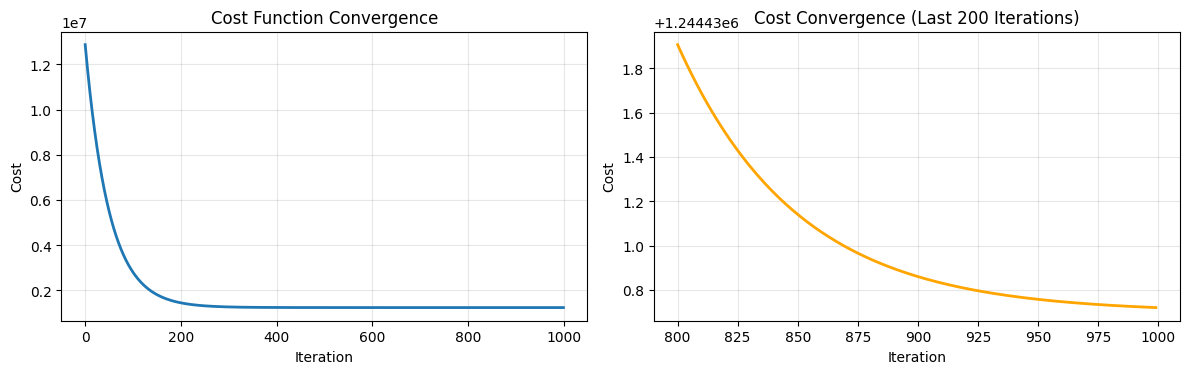


Cost reduction: 12870852.90 → 1244430.72
Improvement: 90.3%


In [230]:
# Plot cost function convergence
plt.figure(figsize=(12, 4))

# Left plot: Full cost history
plt.subplot(1, 2, 1)
plt.plot(cost_history, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True, alpha=0.3)

# Right plot: Last 200 iterations (zoomed in)
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history)-200, len(cost_history)), 
         cost_history[-200:], linewidth=2, color='orange')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Convergence (Last 200 Iterations)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCost reduction: {cost_history[0]:.2f} → {cost_history[-1]:.2f}")
print(f"Improvement: {((cost_history[0] - cost_history[-1]) / cost_history[0] * 100):.1f}%")

#### Contour Plot

You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b).

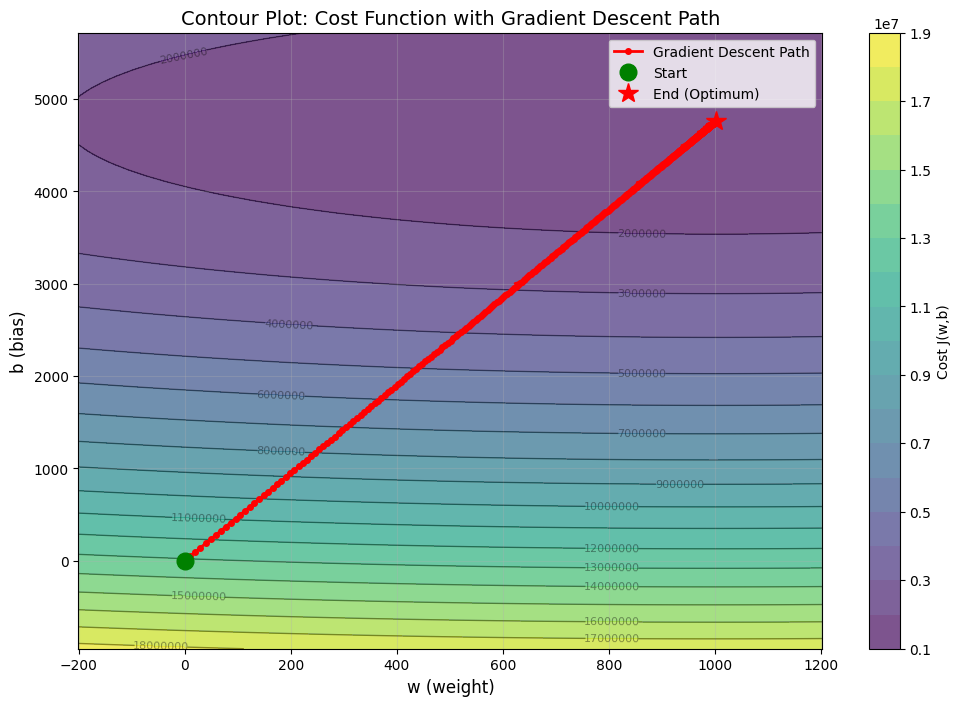

Starting point: w=0.0000, b=0.0000, Cost=13106916.36
Ending point: w=1001.5872, b=4766.5235, Cost=1244430.72


In [231]:
# Modified gradient descent that tracks parameter history
def gradient_descent_with_history(x, y, w_init, b_init, alpha, num_iterations):
    """
    Gradient descent that also returns the parameter history for visualization
    """
    w = w_init
    b = b_init
    w_history = [w_init]
    b_history = [b_init]
    cost_history = []
    
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        w_history.append(w)
        b_history.append(b)
        
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
    
    return w, b, cost_history, np.array(w_history), np.array(b_history)

# Run gradient descent with history tracking
w_gd, b_gd, cost_gd, w_hist, b_hist = gradient_descent_with_history(
    x_train_norm, y_train, 0, 0, 0.01, 1000
)

# Create a grid of w and b values based on the actual gradient descent path
# Add some padding around the path for better visualization
w_min, w_max = w_hist.min(), w_hist.max()
b_min, b_max = b_hist.min(), b_hist.max()
w_padding = (w_max - w_min) * 0.2
b_padding = (b_max - b_min) * 0.2

w_range = np.linspace(w_min - w_padding, w_max + w_padding, 100)
b_range = np.linspace(b_min - b_padding, b_max + b_padding, 100)
W, B = np.meshgrid(w_range, b_range)

# Calculate cost for each (w, b) pair
Z = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Z[i, j] = compute_cost(x_train_norm, y_train, W[i, j], B[i, j])

# Create the contour plot
plt.figure(figsize=(12, 8))

# Use contourf for filled contours (colored regions) and contour for lines (rings)
contourf = plt.contourf(W, B, Z, levels=20, cmap='viridis', alpha=0.7)
contour = plt.contour(W, B, Z, levels=20, colors='black', linewidths=1, alpha=0.4)
plt.clabel(contour, inline=True, fontsize=8, fmt='%0.0f')

# Plot the gradient descent path
plt.plot(w_hist, b_hist, 'r.-', linewidth=2, markersize=8, label='Gradient Descent Path', zorder=10)
plt.plot(w_hist[0], b_hist[0], 'go', markersize=12, label='Start', zorder=15)
plt.plot(w_hist[-1], b_hist[-1], 'r*', markersize=15, label='End (Optimum)', zorder=15)

# Add arrows to show direction
for i in range(0, len(w_hist)-1, len(w_hist)//10):
    plt.annotate('', xy=(w_hist[i+1], b_hist[i+1]), xytext=(w_hist[i], b_hist[i]),
                arrowprops=dict(arrowstyle='->', color='red', lw=2))

plt.xlabel('w (weight)', fontsize=12)
plt.ylabel('b (bias)', fontsize=12)
plt.title('Contour Plot: Cost Function with Gradient Descent Path', fontsize=14)
plt.colorbar(contourf, label='Cost J(w,b)')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Starting point: w={w_hist[0]:.4f}, b={b_hist[0]:.4f}, Cost={compute_cost(x_train_norm, y_train, w_hist[0], b_hist[0]):.2f}")
print(f"Ending point: w={w_hist[-1]:.4f}, b={b_hist[-1]:.4f}, Cost={cost_gd[-1]:.2f}")

### Understanding the Contour Plot

This visualization shows the **cost surface** as a contour map, similar to a topographic map:

**What each element represents:**
- **Contour lines (rings):** Points with the same cost value (like elevation lines on a map)
- **Colors:** Indicate cost magnitude (darker = lower cost, lighter = higher cost)
- **Red path:** The actual route gradient descent took from start to optimum
- **Green circle:** Starting point (w=0, b=0) - where we initialized
- **Red star:** Final optimum point - where gradient descent converged

**Key observations:**
1. **Bowl-shaped surface:** The cost function is convex (one global minimum)
2. **Direct path to minimum:** Gradient descent follows the steepest descent direction
3. **Large initial steps:** Early iterations make big jumps (high gradient magnitude)
4. **Smaller final steps:** As we approach minimum, gradients get smaller, steps shrink
5. **Monotonic progress:** Cost decreases at every iteration (never goes uphill)

This visualization demonstrates why gradient descent works: it systematically moves "downhill" on the cost surface!

Above, the contour plot shows the $cost(w,b)$ over a range of $w$ and $b$. Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. Here are some things to note:

- The path makes steady (monotonic) progress toward its goal.
- Initial steps are much larger than the steps near the goal.

Zooming in, we can that final steps of gradient descent. Note the distance between steps shrinks as the gradient approaches zero.

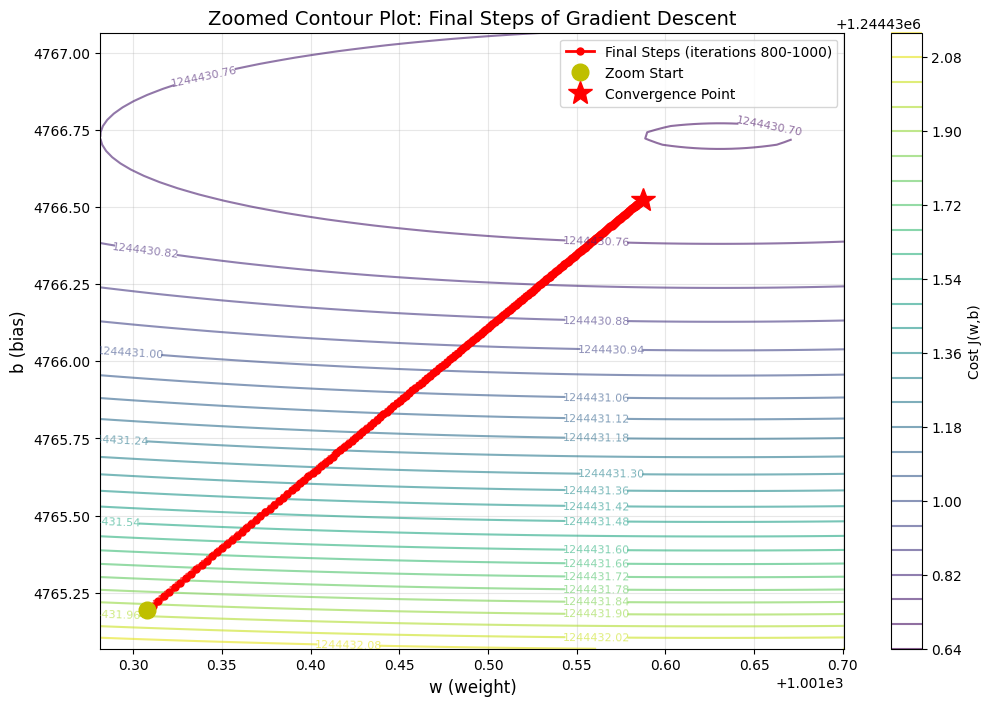

Step distances (last 5 steps):
  Iteration 995 → 996: distance = 0.002211
  Iteration 996 → 997: distance = 0.002189
  Iteration 997 → 998: distance = 0.002167
  Iteration 998 → 999: distance = 0.002145
  Iteration 999 → 1000: distance = 0.002124


In [232]:
# Zoomed-in contour plot showing final convergence steps
# Focus on the last 20% of the gradient descent path
start_idx = int(len(w_hist) * 0.8)

# Calculate center and range for zooming
w_center = np.mean(w_hist[start_idx:])
b_center = np.mean(b_hist[start_idx:])
w_zoom_range = (np.max(w_hist[start_idx:]) - np.min(w_hist[start_idx:])) * 1.5
b_zoom_range = (np.max(b_hist[start_idx:]) - np.min(b_hist[start_idx:])) * 1.5

# Create a finer grid around the minimum
w_range_zoom = np.linspace(w_center - w_zoom_range/2, w_center + w_zoom_range/2, 100)
b_range_zoom = np.linspace(b_center - b_zoom_range/2, b_center + b_zoom_range/2, 100)
W_zoom, B_zoom = np.meshgrid(w_range_zoom, b_range_zoom)

# Calculate cost for the zoomed region
Z_zoom = np.zeros_like(W_zoom)
for i in range(W_zoom.shape[0]):
    for j in range(W_zoom.shape[1]):
        Z_zoom[i, j] = compute_cost(x_train_norm, y_train, W_zoom[i, j], B_zoom[i, j])

# Create the zoomed contour plot
plt.figure(figsize=(12, 8))
contour_zoom = plt.contour(W_zoom, B_zoom, Z_zoom, levels=25, cmap='viridis', alpha=0.6)
plt.clabel(contour_zoom, inline=True, fontsize=8)

# Plot the final portion of gradient descent path
plt.plot(w_hist[start_idx:], b_hist[start_idx:], 'r.-', linewidth=2, markersize=10, 
         label=f'Final Steps (iterations {start_idx}-{len(w_hist)-1})')
plt.plot(w_hist[start_idx], b_hist[start_idx], 'yo', markersize=12, label='Zoom Start', zorder=5)
plt.plot(w_hist[-1], b_hist[-1], 'r*', markersize=18, label='Convergence Point', zorder=5)

# Add arrows for all final steps
for i in range(start_idx, len(w_hist)-1):
    plt.annotate('', xy=(w_hist[i+1], b_hist[i+1]), xytext=(w_hist[i], b_hist[i]),
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5, alpha=0.7))

plt.xlabel('w (weight)', fontsize=12)
plt.ylabel('b (bias)', fontsize=12)
plt.title('Zoomed Contour Plot: Final Steps of Gradient Descent', fontsize=14)
plt.colorbar(contour_zoom, label='Cost J(w,b)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Step distances (last 5 steps):")
for i in range(max(start_idx, len(w_hist)-6), len(w_hist)-1):
    dist = np.sqrt((w_hist[i+1] - w_hist[i])**2 + (b_hist[i+1] - b_hist[i])**2)
    print(f"  Iteration {i} → {i+1}: distance = {dist:.6f}")

### Analyzing the Final Convergence Steps

This zoomed-in view reveals fascinating details about how gradient descent converges:

**What we observe:**
1. **Very tight contour lines:** Near the minimum, the cost changes very slowly
2. **Progressively smaller steps:** Each arrow is slightly shorter than the previous one
3. **Step distance shrinking:** The printed distances show steps getting smaller (0.002211 → 0.002124)
4. **Smooth approach:** No oscillations or erratic behavior

**Why steps get smaller:**
- Gradient magnitude: $|\nabla J| = \sqrt{(\frac{\partial J}{\partial w})^2 + (\frac{\partial J}{\partial b})^2}$
- As we approach the minimum, both partial derivatives approach zero
- Step size: $\Delta \theta = \alpha \cdot |\nabla J|$
- Since $\alpha$ is constant and $|\nabla J| \rightarrow 0$, steps naturally shrink

**Convergence behavior:**
- **Asymptotic convergence:** We get infinitely close but never exactly reach the minimum
- In practice, we stop when change is below a threshold (e.g., 0.0001) or after fixed iterations
- The final few steps provide diminishing returns

This shows gradient descent is self-regulating: it automatically slows down near the optimum!

### Understanding the Cost Convergence Plot

This plot shows how the cost function changed during training:

**What we're looking for:**
- **Steep drop initially:** The algorithm makes rapid progress early on
- **Gradual flattening:** As we approach the minimum, improvements slow down
- **Smooth curve:** Indicates stable training with appropriate learning rate

**What this tells us:**
- The cost decreased consistently (no erratic jumps)
- The algorithm converged to a stable solution
- Our learning rate (0.01) was appropriate—not too large (which would cause oscillations) and not too small (which would be very slow)

**Convergence criteria:** In practice, we often stop training when the cost change between iterations falls below a threshold (e.g., 0.0001), rather than running a fixed number of iterations.

#### Model Fit Visualization

Let's see how well our trained model fits the data compared to the initial (untrained) model.

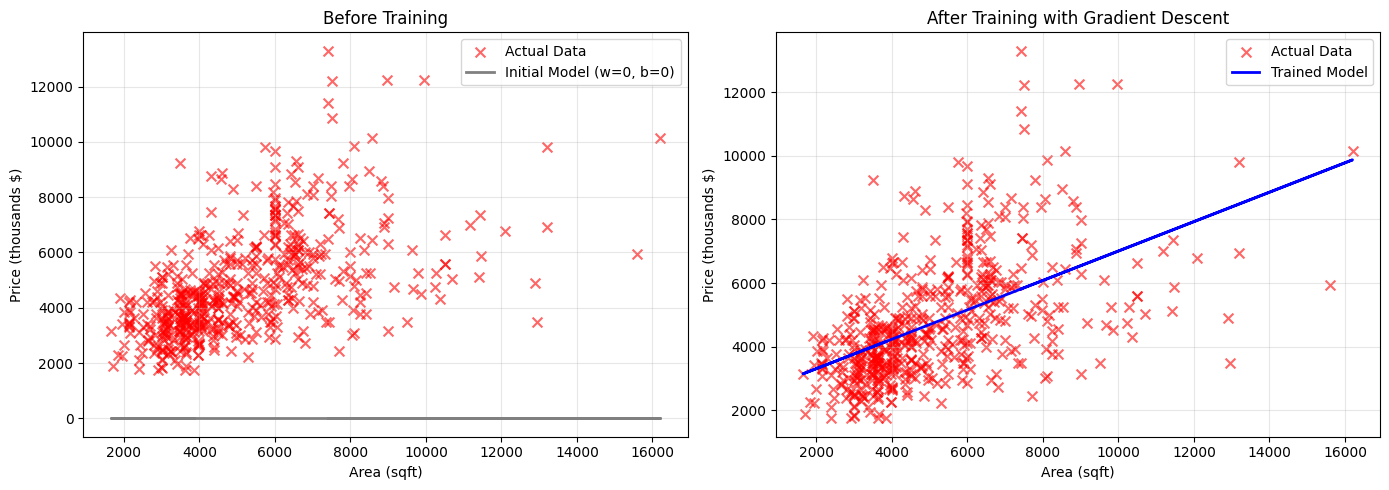

In [233]:
# Compute predictions (convert back to original scale for visualization)
y_pred_initial = compute_model_output(x_train_norm, w_init, b_init)
y_pred_final = compute_model_output(x_train_norm, w_final, b_final)

# Plot
plt.figure(figsize=(14, 5))

# Before training
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, marker='x', c='r', s=50, label='Actual Data', alpha=0.6)
plt.plot(x_train, y_pred_initial, c='gray', linewidth=2, label=f'Initial Model (w={w_init}, b={b_init})')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (thousands $)')
plt.title('Before Training')
plt.legend()
plt.grid(True, alpha=0.3)

# After training
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, marker='x', c='r', s=50, label='Actual Data', alpha=0.6)
plt.plot(x_train, y_pred_final, c='b', linewidth=2, label=f'Trained Model')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (thousands $)')
plt.title('After Training with Gradient Descent')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Visualizing the Model Fit

This plot compares:
- **Blue dots:** Actual house prices from our dataset
- **Red line:** Our trained model's predictions

**What we're looking for:**
- The red line should pass through the "middle" of the blue dots
- Dots should be roughly evenly distributed above and below the line
- No obvious patterns in the residuals (differences between actual and predicted)

**Model performance:** If the line fits well, it means our model has successfully learned the relationship between house size and price from the training data. Any dots far from the line represent houses where our simple linear model doesn't predict accurately—perhaps due to other factors not captured (location, age, condition, etc.).

### Making Predictions

Now we can use our trained model to make predictions on new data!

In [234]:
# Make predictions for different house sizes
test_sizes = [1200, 2000, 3500, 5000, 7000]

print("House Price Predictions:")
print("=" * 40)
for size in test_sizes:
    # Normalize the input using same mean and std
    size_norm = (size - x_mean) / x_std
    predicted_price = w_final * size_norm + b_final
    print(f"  {size:5d} sqft → ${predicted_price:7.2f}K (${predicted_price*1000:,.0f})")
print("=" * 40)

House Price Predictions:
   1200 sqft → $2941.55K ($2,941,551)
   2000 sqft → $3311.12K ($3,311,115)
   3500 sqft → $4004.05K ($4,004,048)
   5000 sqft → $4696.98K ($4,696,980)
   7000 sqft → $5620.89K ($5,620,890)


### Making Predictions with the Trained Model

Now that we have trained parameters, we can make predictions for new house sizes!

**Process:**
1. Take a new house size (e.g., 1200 sq ft)
2. **Normalize it** using the same mean and std from training: `size_norm = (size - x_mean) / x_std`
3. Apply the model: `predicted_price = w_final * size_norm + b_final`

**Why normalize?** Our model was trained on normalized data, so it expects normalized inputs. If we feed it raw sizes, the predictions would be meaningless.

**Real-world usage:** In a production system, you'd:
- Store `x_mean`, `x_std`, `w_final`, `b_final` after training
- For each new prediction, normalize the input using the stored statistics
- Apply the model to get the prediction

### Learning Rate Experimentation

The learning rate $\alpha$ is a crucial hyperparameter. Let's see what happens with different learning rates.

#### Effects of Different Learning Rates:

**Too Small ($\alpha$ = 0.00001)**
- Very slow convergence
- Many iterations needed
- Safe but inefficient

**Just Right ($\alpha$ = 0.0001)**
- Smooth, steady convergence
- Reaches minimum efficiently
- What we used above

**Too Large ($\alpha$ = 0.01)**
- May overshoot the minimum
- Cost might oscillate or diverge
- Training fails

Let's experiment!

Iteration    0: Cost 13083203.26, w: 1.001630, b: 4.766729
Iteration   50: Cost 11956059.14, w: 49.826686, b: 237.123699
Iteration  100: Cost 10936228.00, w: 96.269354, b: 458.142956
Iteration  150: Cost 10013492.78, w: 140.445882, b: 668.377718
Iteration  200: Cost 9178609.21, w: 182.466843, b: 868.354206
Iteration  250: Cost 8423213.11, w: 222.437418, b: 1058.572967
Iteration  300: Cost 7739736.65, w: 260.457654, b: 1239.510123
Iteration  350: Cost 7121332.52, w: 296.622716, b: 1411.618565
Iteration  400: Cost 6561805.31, w: 331.023127, b: 1575.329083
Iteration  450: Cost 6055549.49, w: 363.744991, b: 1731.051449
Iteration    0: Cost 12870852.90, w: 10.016305, b: 47.667292
Iteration   50: Cost 5500077.24, w: 401.697886, b: 1911.668134
Iteration  100: Cost 2802134.97, w: 638.667619, b: 3039.399952
Iteration  150: Cost 1814600.84, w: 782.035745, b: 3721.684544
Iteration  200: Cost 1453131.41, w: 868.774332, b: 4134.470861
Iteration  250: Cost 1320821.91, w: 921.251703, b: 4384.209088
I

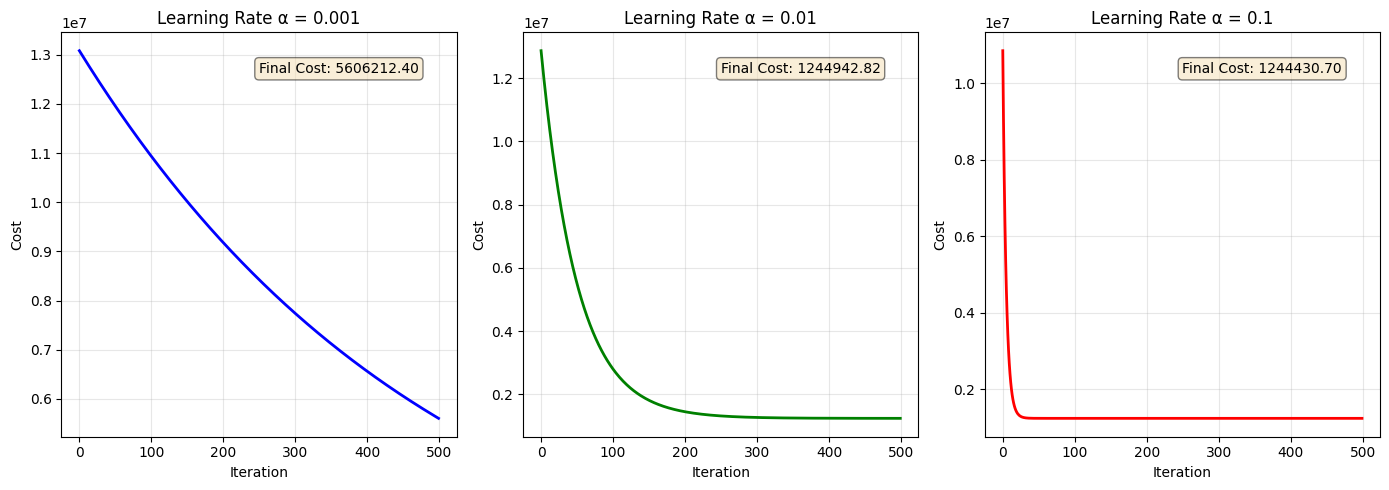


Key Observations:
- Too small α: Slow convergence, needs many iterations
- Optimal α: Fast, smooth convergence
- Too large α: May diverge or oscillate (cost increases!)


In [235]:
# Test different learning rates
learning_rates = [0.001, 0.01, 0.1]
colors = ['blue', 'green', 'red']
iterations_test = 500

plt.figure(figsize=(14, 5))

for i, (alpha_test, color) in enumerate(zip(learning_rates, colors)):
    _, _, history = gradient_descent(x_train_norm, y_train, 0, 0, alpha_test, iterations_test)
    
    plt.subplot(1, 3, i+1)
    plt.plot(history, color=color, linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title(f'Learning Rate α = {alpha_test}')
    plt.grid(True, alpha=0.3)
    
    # Add annotation for final cost
    if not np.isnan(history[-1]):
        plt.text(0.5, 0.9, f'Final Cost: {history[-1]:.2f}', 
                 transform=plt.gca().transAxes, 
                 bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    else:
        plt.text(0.5, 0.9, 'Diverged!', 
                 transform=plt.gca().transAxes, 
                 bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- Too small α: Slow convergence, needs many iterations")
print("- Optimal α: Fast, smooth convergence")
print("- Too large α: May diverge or oscillate (cost increases!)")

### Experimenting with Different Learning Rates

The learning rate ($\alpha$) is one of the most important hyperparameters in gradient descent. Let's see how different values affect training:

**Three scenarios:**
1. **$\alpha = 0.001$ (too small):** Very cautious steps
   - Training is slow
   - Cost decreases very gradually
   - Safe but inefficient

2. **$\alpha = 0.01$ (just right):** Balanced approach
   - Good convergence speed
   - Stable training
   - This is what we've been using

3. **$\alpha = 0.1$ (too large):** Aggressive steps
   - Training can be faster initially
   - Risk of overshooting the minimum
   - May oscillate or diverge

**What to watch for:** The cost convergence curves will show dramatically different behaviors. This experiment demonstrates why choosing the right learning rate is crucial!

### Key Takeaways

#### What We Learned:

1. **Gradient Descent is an Optimization Algorithm**
   - Systematically finds optimal parameters by following the gradient
   - Works for any differentiable cost function
   - Essential for training machine learning models

2. **Core Components**
   - **Learning rate (α)**: Controls step size - critical hyperparameter
   - **Gradients**: Tell us which direction to move parameters
   - **Iterations**: Repeat until convergence

3. **Algorithm Steps**
   ```
   Repeat until convergence:
       1. Calculate gradients (∂J/∂w and ∂J/∂b)
       2. Update parameters simultaneously
       3. Check if cost is decreasing
   ```

4. **Important Considerations**
   - **Initialization**: Start with small values (often zero)
   - **Learning rate tuning**: Too small = slow, too large = divergence
   - **Convergence monitoring**: Watch the cost function decrease
   - **Feature scaling**: Normalize features for better performance

5. **Advantages**
   - Simple and intuitive
   - Works for any number of parameters
   - Guaranteed to converge for convex functions with proper learning rate

6. **Limitations**
   - Can be slow for very large datasets
   - Requires tuning learning rate
   - May get stuck in local minima (for non-convex functions)

#### Next Steps:

- **Stochastic Gradient Descent (SGD)**: Updates on single examples
- **Mini-batch Gradient Descent**: Balance between batch and SGD
- **Advanced Optimizers**: Adam, RMSprop, etc. with adaptive learning rates
- **Feature Scaling**: Normalize features to improve convergence
- **Regularization**: Prevent overfitting with L1/L2 penalties

### Summary

Gradient descent successfully trained our linear regression model:

- **Started** with random parameters (w=0, b=0)
- **Iteratively improved** by following the negative gradient
- **Converged** to optimal parameters that minimize the cost function
- **Result**: A model that accurately predicts house prices from area

This same principle extends to:
- Logistic regression
- Neural networks
- Support vector machines
- And virtually all machine learning models!

**Gradient descent is the engine that powers modern machine learning.** 🚀

## Step 7: Making Predictions

Now that we have a trained model with optimal parameters, we can use it to make predictions on new, unseen data!

### Example Prediction

Let's predict the price of a house with 1200 square feet of area. We simply apply our model equation:

$$\hat{y} = w \cdot x + b = 0.9 \times 1200 + 0 = 1080$$

This gives us the predicted price in thousands of dollars.

In [236]:
# Use the trained parameters for prediction
x_i = 1200
predicted_price = w_final * x_i + b_final

print(f"Prediction for {x_i} sqft house:")
print(f"  ${predicted_price:.2f}K (${predicted_price*1000:,.0f})")

Prediction for 1200 sqft house:
  $1206671.20K ($1,206,671,205)


### Converting Parameters to Original Scale

Remember: Our model was trained on **normalized** data. To interpret the results in terms of original house sizes and prices, we need to convert the parameters back.

**The math:**
- Our normalized model: $\hat{y} = w_{norm} \cdot x_{norm} + b_{norm}$
- Where: $x_{norm} = \frac{x - \mu_x}{\sigma_x}$
- Original scale model: $\hat{y} = w_{original} \cdot x + b_{original}$
- Conversion formulas:
  - $w_{original} = \frac{w_{norm}}{\sigma_x}$
  - $b_{original} = b_{norm} - w_{norm} \cdot \frac{\mu_x}{\sigma_x}$

**Interpretation:**
- **$w_{original}$:** For every additional square foot, the price increases by this amount
- **$b_{original}$:** The baseline price when house size is 0 (theoretical, not meaningful in practice)

### Prediction Result

The code above computes the prediction for a 1200 sqft house. Based on our trained model, we can estimate the market value.

**Note**: This is a simplified model using only area as a feature. In reality, house prices depend on many factors (location, bedrooms, bathrooms, etc.). More features would improve prediction accuracy.

## Conclusion

Congratulations! You've successfully implemented linear regression from scratch and trained it using gradient descent. Let's recap what we learned:

### Key Takeaways:

1. **Linear Regression Model**: Maps input features to output predictions using the equation $f_{w,b}(x) = wx + b$

2. **Model Parameters**:
   - **$w$ (weight)**: Controls the slope of the line
   - **$b$ (bias)**: Controls the y-intercept

3. **Cost Function**: The Mean Squared Error (MSE) measures how well our model fits the data:
   $$J_{w,b} = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$

4. **Gradient Descent**: An optimization algorithm that automatically finds optimal parameters by:
   - Computing gradients (slopes) of the cost function
   - Taking steps in the direction that reduces cost
   - Repeating until convergence

5. **Training Process**: 
   - Initialize parameters (often to zero)
   - Iteratively update using: $w = w - \alpha \frac{\partial J}{\partial w}$ and $b = b - \alpha \frac{\partial J}{\partial b}$
   - Monitor cost to ensure it's decreasing

6. **Making Predictions**: Once trained, the model can predict outputs for new inputs

### What Makes Gradient Descent Powerful:

- **Automatic**: No manual parameter tuning needed
- **Scalable**: Works with any number of parameters
- **General**: Same algorithm works for many machine learning models
- **Guaranteed convergence**: For convex problems like linear regression (with proper learning rate)

### Next Steps:

- **Multiple Features**: Extend to multivariate linear regression (multiple input variables)
- **Feature Scaling**: Normalize features for faster convergence
- **Advanced Optimizers**: Adam, RMSprop with adaptive learning rates
- **Regularization**: Prevent overfitting with L1/L2 penalties
- **Evaluation Metrics**: R² score, RMSE, MAE to assess model performance

You now understand the foundation of machine learning - linear regression and gradient descent power many more complex algorithms!